# hurovitz1999

This dataset comes from [DreamBank](https://dreambank.net). It merges the [Blind dreamers (F)](https://dreambank.net/grid.cgi#blind-f) and [Blind dreamers (M)](https://dreambank.net/grid.cgi#blind-m) datasets from [an archived copy](https://doi.org/10.5281/zenodo.18159468) of DreamBank hosted on Zenodo. See the krank [GitHub Issue](https://github.com/remrama/krank/issues/52) and the [hurovitz1999 docs page](https://remrama.github.io/krank/corpora/hurovitz1999) for more info.

## Setup

In [1]:
import hashlib
import os
import re
import sys
import textwrap
from copy import copy
from datetime import datetime, timezone

import pandas as pd

from IPython.display import display, IFrame

sys.path.append(os.path.abspath(".."))
import utils_dreambank

Identify the DreamBank dataset IDs of the datasets that will be included.

In [2]:
DATASETS_IDS = ["blind-f", "blind-m"]

## Load

Use utility functions to load in all 3 components (dreams, info, moreinfo) from each dataset.

In [3]:
blind_f_dreams = utils_dreambank.parse_dreams("v2", "blind-f", as_dataframe=True)
blind_m_dreams = utils_dreambank.parse_dreams("v2", "blind-m", as_dataframe=True)

blind_f_info = utils_dreambank.parse_info("v2", "blind-f")
blind_m_info = utils_dreambank.parse_info("v2", "blind-m")

blind_f_moreinfo = utils_dreambank.parse_moreinfo("v2", "blind-f")
blind_m_moreinfo = utils_dreambank.parse_moreinfo("v2", "blind-m")

### Snapshot

Take a look at the raw source data.

In [4]:
display(blind_f_dreams.head(n=10))

,dataset_id,dream_id,metadata,word_count,dream_text
0,blind-f,101-01,F-A-T-19/27,231,I was at my parent's house that I grew up in a...
1,blind-f,101-02,F-A-T-19/27,253,I was back in the house that I grew up in and ...
2,blind-f,101-03,F-A-T-19/27,207,Right before waking up I remember standing in ...
3,blind-f,101-04,F-A-T-19/27,358,Last night I dreamed that I went back to schoo...
4,blind-f,101-05,F-A-T-19/27,167,"There was a book published, like a book of ess..."
5,blind-f,101-06,F-A-T-19/27,672,"I had a weird sort of dream, I was stuck somew..."
6,blind-f,101-07,F-A-T-19/27,269,[1997-05-08] I was in my parent's old house an...
7,blind-f,101-08,F-A-T-19/27,279,[1997-05-09] I had a dream I was in a mall and...
8,blind-f,101-09,F-A-T-19/27,422,I was in my old high school and I was sitting ...
9,blind-f,101-10,F-A-T-19/27,352,"I was with my best friend, X and we were prepa..."


In [5]:
display(blind_m_dreams.head(n=10))

,dataset_id,dream_id,metadata,word_count,dream_text
0,blind-m,104-01,M-C-T-45/45,69,[1997-05-18] Dreamed I was in my computer room...
1,blind-m,104-02,M-C-T-45/45,118,"[1997-05-18] I dreamed I was riding on a bus, ..."
2,blind-m,104-03,M-C-T-45/45,113,"[1997-05-19] I was doing the dinner dishes, my..."
3,blind-m,104-04,M-C-T-45/45,149,"I dreamed I was in a room, I think it was a li..."
4,blind-m,104-05,M-C-T-45/45,161,[1997-05-22] The only dream I remember is a ve...
5,blind-m,104-06,M-C-T-45/45,289,[1997-05-24] I was coming out of the subway an...
6,blind-m,104-07,M-C-T-45/45,70,[1997-05-25] Just came home from the grocery s...
7,blind-m,104-08,M-C-T-45/45,622,[1997-05-26] We were on vacation with my cousi...
8,blind-m,104-09,M-C-T-45/45,34,[1997-05-27] A friend of my daughters came to ...
9,blind-m,104-10,M-C-T-45/45,219,"[1997-05-28] I was in a mobile home, decided t..."


In [6]:
display(blind_f_info)

{'dataset_id': 'blind-f',
 'name': 'Blind dreamers (F)',
 'timeframe': 'mid-1990s',
 'sex': 'female',
 'n_dreams': 238,
 'description': 'These dreams were collected in the mid-1990s from several men and women ranging from their 20s to their 70s, but most are from 40 to 65. Some are congenitally blind; most of the others have been blind for over 20 years, but one older woman has been blind for only a few years. (For more about this series, including a table with details about each dreamer, click here. For a published article discussing these dream series and summarizing other research on blind dreamers, click here.)'}

In [7]:
display(blind_m_info)

{'dataset_id': 'blind-m',
 'name': 'Blind dreamers (M)',
 'timeframe': 'mid-1990s',
 'sex': 'male',
 'n_dreams': 143,
 'description': 'These dreams were collected in the mid-1990s from several men and women ranging from their 20s to their 70s, but most are from 40 to 65. Some are congenitally blind; most of the others have been blind for over 20 years, but one older woman has been blind for only a few years. (For more about this series, including a table with details about each dreamer, click here. For a published article discussing these dream series and summarizing other research on blind dreamers, click here.)'}

In [8]:
display(blind_f_moreinfo)

{'dataset_id': 'blind-f',
 'name': 'Blind dreamers (F)',
 'sex': 'female',
 'timeframe': 'mid-1990s',
 'n_dreams': 238,
 'moreinfo': 'These dreams have been content analyzed for several major Hall/Van de Castle categories. They have been studied also for mentions of visual, auditory, olfactory, gustatory, and tactile sensations. No contact with the dreamers is possible.\n\n\nCode #SexAgeYears ofEducationOccupationYears Blind(Nature/Degreeof Blindness)# ofdreamreports\n101F2715Unemployed19 (A/T)10\n102F3218Unemployed32 (C/T)10\n103F7312Sales clerk (retired)10 (A/P)39\n111F5019Vocational rehabilitation counselor50 (C/L)59\n114F5212Envelope stuffer52 (C/T)37\n115F6014Cook at a school for the blind60 (A/T)6\n117F4418Factory worker (retired)44 (C/T)32\n120F4918Grant writer for Blind Services47 (A/T)10\n122F5812Unemployed46 (A/T)24\n125F4413Medical transcriptionist44 (C/T)9\n104M4516Human resources management45 (C/T)61\n105M5018Rehabilitation specialist43 (A/P)21\n109M2414.5Software tech wor

In [9]:
display(blind_m_moreinfo)

{'dataset_id': 'blind-m',
 'name': 'Blind dreamers (M)',
 'sex': 'male',
 'timeframe': 'mid-1990s',
 'n_dreams': 143,
 'moreinfo': 'These dreams have been content analyzed for several major Hall/Van de Castle categories. They have been studied also for mentions of visual, auditory, olfactory, gustatory, and tactile sensations. No contact with the dreamers is possible.\n\n\nCode #SexAgeYears ofEducationOccupationYears Blind(Nature/Degreeof Blindness)# ofdreamreports\n101F2715Unemployed19 (A/T)10\n102F3218Unemployed32 (C/T)10\n103F7312Sales clerk (retired)10 (A/P)39\n111F5019Vocational rehabilitation counselor50 (C/L)59\n114F5212Envelope stuffer52 (C/T)37\n115F6014Cook at a school for the blind60 (A/T)6\n117F4418Factory worker (retired)44 (C/T)32\n120F4918Grant writer for Blind Services47 (A/T)10\n122F5812Unemployed46 (A/T)24\n125F4413Medical transcriptionist44 (C/T)9\n104M4516Human resources management45 (C/T)61\n105M5018Rehabilitation specialist43 (A/P)21\n109M2414.5Software tech worke

View summary info of the dataframes.

In [10]:
blind_f_dreams.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dataset_id  238 non-null    object
 1   dream_id    238 non-null    object
 2   metadata    238 non-null    object
 3   word_count  238 non-null    int64 
 4   dream_text  238 non-null    object
dtypes: int64(1), object(4)
memory usage: 228.9 KB


In [11]:
blind_m_dreams.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dataset_id  143 non-null    object
 1   dream_id    143 non-null    object
 2   metadata    143 non-null    object
 3   word_count  143 non-null    int64 
 4   dream_text  143 non-null    object
dtypes: int64(1), object(4)
memory usage: 124.3 KB


In [12]:
display(blind_f_dreams.describe(include="number"))

,word_count
count,238.000000
mean,150.768908
std,114.980136
min,18.000000
25%,74.000000
50%,116.000000
75%,187.750000
max,782.000000


In [13]:
display(blind_f_dreams.describe(exclude="number"))

,dataset_id,dream_id,metadata,dream_text
count,238,238,238,238
unique,1,238,9,238
top,blind-f,101-01,F-C-L-50/50,I was at my parent's house that I grew up in a...
freq,238,1,60,1


In [14]:
display(blind_m_dreams.describe(include="number"))

,word_count
count,143.000000
mean,130.783217
std,128.247513
min,12.000000
25%,45.000000
50%,103.000000
75%,157.000000
max,898.000000


In [15]:
display(blind_m_dreams.describe(exclude="number"))

,dataset_id,dream_id,metadata,dream_text
count,143,143,143,143
unique,1,143,5,143
top,blind-m,104-01,M-C-T-45/45,[1997-05-18] Dreamed I was in my computer room...
freq,143,1,61,1


## Process

Merge the two dreams dataframes.

In [16]:
dreams = pd.concat([blind_f_dreams, blind_m_dreams], ignore_index=True)

In [17]:
dreams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dataset_id  381 non-null    object
 1   dream_id    381 non-null    object
 2   metadata    381 non-null    object
 3   word_count  381 non-null    int64 
 4   dream_text  381 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.0+ KB


In [18]:
display(dreams.describe(include="number"))

,word_count
count,381.000000
mean,143.267717
std,120.355359
min,12.000000
25%,63.000000
50%,110.000000
75%,176.000000
max,898.000000


In [19]:
display(dreams.describe(exclude="number"))

,dataset_id,dream_id,metadata,dream_text
count,381,381,381,381
unique,2,381,14,381
top,blind-f,101-01,M-C-T-45/45,I was at my parent's house that I grew up in a...
freq,238,1,61,1


Extract author metadata from tables in moreinfo.

The moreinfo for these datasets includes a table of extensive metadata from each participant/author.

In [20]:
assert blind_f_moreinfo["moreinfo"] == blind_m_moreinfo["moreinfo"]
moreinfo = copy(blind_f_moreinfo)
moreinfo_body = moreinfo["moreinfo"]
moreinfo_body_wrapped = "\n".join(
    [ textwrap.fill(line, width=100) for line in moreinfo_body.splitlines() ]
)
print(moreinfo_body_wrapped)

These dreams have been content analyzed for several major Hall/Van de Castle categories. They have
been studied also for mentions of visual, auditory, olfactory, gustatory, and tactile sensations. No
contact with the dreamers is possible.


Code #SexAgeYears ofEducationOccupationYears Blind(Nature/Degreeof Blindness)# ofdreamreports
101F2715Unemployed19 (A/T)10
102F3218Unemployed32 (C/T)10
103F7312Sales clerk (retired)10 (A/P)39
111F5019Vocational rehabilitation counselor50 (C/L)59
114F5212Envelope stuffer52 (C/T)37
115F6014Cook at a school for the blind60 (A/T)6
117F4418Factory worker (retired)44 (C/T)32
120F4918Grant writer for Blind Services47 (A/T)10
122F5812Unemployed46 (A/T)24
125F4413Medical transcriptionist44 (C/T)9
104M4516Human resources management45 (C/T)61
105M5018Rehabilitation specialist43 (A/P)21
109M2414.5Software tech worker20 (A/T)20
113M4513Piano tuner/technician17 (A/T)22
124M4612Small engine repairs46 (C/T)12



C = congenital blindness; A = adventitious blindness.

View the HTML version of the tables by pulling up the current website.

In [21]:
TABLE_URL_TEMPLATE = "https://dreambank.net/more_info.cgi?further=1&series={dataset_id}"
blind_f_url = TABLE_URL_TEMPLATE.format(dataset_id="blind-f")
blind_m_url = TABLE_URL_TEMPLATE.format(dataset_id="blind-m")
IFrame(blind_f_url, width=800, height=625)

In [22]:
IFrame(blind_m_url, width=800, height=625)

Extract the table from the raw HTML.

In [23]:
tables = {}
for ds in DATASETS_IDS:
    content = utils_dreambank.extract_file_content("v2", ds, "moreinfo")
    table = pd.read_html(content)[0]
    tables[ds] = table
assert tables["blind-f"].equals(tables["blind-m"])
authors = tables["blind-f"].copy()

In [24]:
display(authors)

,Code #,Sex,Age,Years of Education,Occupation,Years Blind (Nature/Degree of Blindness),# of dream reports
0,101,F,27,15.0,Unemployed,19 (A/T),10
1,102,F,32,18.0,Unemployed,32 (C/T),10
2,103,F,73,12.0,Sales clerk (retired),10 (A/P),39
3,111,F,50,19.0,Vocational rehabilitation counselor,50 (C/L),59
4,114,F,52,12.0,Envelope stuffer,52 (C/T),37
5,115,F,60,14.0,Cook at a school for the blind,60 (A/T),6
6,117,F,44,18.0,Factory worker (retired),44 (C/T),32
7,120,F,49,18.0,Grant writer for Blind Services,47 (A/T),10
8,122,F,58,12.0,Unemployed,46 (A/T),24
9,125,F,44,13.0,Medical transcriptionist,44 (C/T),9


Parse out the 3 different variables from the "Years Blind (Nature/Degree of Blindness)" column.

In [25]:
YEARS_BLIND_RE = r"^(?P<YearsBlind>\d{2}) \((?P<Nature>[A-Z])/(?P<DegreeOfBlindness>[A-Z])\)$"
assert authors["Years Blind (Nature/Degree of Blindness)"].str.match(YEARS_BLIND_RE).all()
years_blind, nature, degree_of_blindness = authors["Years Blind (Nature/Degree of Blindness)"].str.extract(YEARS_BLIND_RE, expand=True).T.values
authors.insert(5, "Years Blind", years_blind.astype(int))
authors.insert(6, "Nature", nature)
authors.insert(7, "Degree of Blindness", degree_of_blindness)
authors = authors.drop(columns=["Years Blind (Nature/Degree of Blindness)"])

Separate the retired out as it's own variable.

In [26]:
OCCUPATION_RE = r"^(?P<Occupation>.+?)(?: \((?P<Retired>.+?)\))?$"
assert authors["Occupation"].str.match(OCCUPATION_RE).all()
occupation, retired = authors["Occupation"].str.extract(OCCUPATION_RE, expand=True).fillna(False).astype({"Retired": bool}).T.to_numpy()
authors["Occupation"] = occupation
authors.insert(5, "Retired", retired)

Sort by Author ID for clarity.

In [27]:
authors = authors.sort_values(by="Code #", ignore_index=True)

In [28]:
display(authors)

,Code #,Sex,Age,Years of Education,Occupation,Retired,Years Blind,Nature,Degree of Blindness,# of dream reports
0,101,F,27,15.0,Unemployed,False,19,A,T,10
1,102,F,32,18.0,Unemployed,False,32,C,T,10
2,103,F,73,12.0,Sales clerk,True,10,A,P,39
3,104,M,45,16.0,Human resources management,False,45,C,T,61
4,105,M,50,18.0,Rehabilitation specialist,False,43,A,P,21
5,109,M,24,14.5,Software tech worker,False,20,A,T,20
6,111,F,50,19.0,Vocational rehabilitation counselor,False,50,C,L,59
7,113,M,45,13.0,Piano tuner/technician,False,17,A,T,22
8,114,F,52,12.0,Envelope stuffer,False,52,C,T,37
9,115,F,60,14.0,Cook at a school for the blind,False,60,A,T,6


Parse the blindness legend from moreinfo and use to replace in dataframe.

In [29]:
LEGEND_RE = r"\s(?P<key>[A-Z]) = (?P<value>[a-z ]+)"
blind_f_legend = dict(re.findall(LEGEND_RE, blind_f_moreinfo["moreinfo"]))
blind_m_legend = dict(re.findall(LEGEND_RE, blind_m_moreinfo["moreinfo"]))
assert blind_f_legend == blind_m_legend
legend = copy(blind_f_legend)

In [30]:
display(legend)

{'C': 'congenital blindness',
 'A': 'adventitious blindness',
 'T': 'total blindness',
 'P': 'partial blindness',
 'L': 'perceives very bright light'}

In [31]:
authors["Nature"] = authors["Nature"].map(legend)
authors["Degree of Blindness"] = authors["Degree of Blindness"].map(legend)

In [32]:
display(authors)

,Code #,Sex,Age,Years of Education,Occupation,Retired,Years Blind,Nature,Degree of Blindness,# of dream reports
0,101,F,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,10
1,102,F,32,18.0,Unemployed,False,32,congenital blindness,total blindness,10
2,103,F,73,12.0,Sales clerk,True,10,adventitious blindness,partial blindness,39
3,104,M,45,16.0,Human resources management,False,45,congenital blindness,total blindness,61
4,105,M,50,18.0,Rehabilitation specialist,False,43,adventitious blindness,partial blindness,21
5,109,M,24,14.5,Software tech worker,False,20,adventitious blindness,total blindness,20
6,111,F,50,19.0,Vocational rehabilitation counselor,False,50,congenital blindness,perceives very bright light,59
7,113,M,45,13.0,Piano tuner/technician,False,17,adventitious blindness,total blindness,22
8,114,F,52,12.0,Envelope stuffer,False,52,congenital blindness,total blindness,37
9,115,F,60,14.0,Cook at a school for the blind,False,60,adventitious blindness,total blindness,6


Clean up the dreams dataframe.

Handle "dream_id" column. Identify metadata values and parse out.

The dream_id column is just the participant/author ID and the number of their dream. We don't need the latter but can parse out the former.

NOTE: There is one row (323) where the dream number has a letter (109-3a). This might mean it's a part of the previous dream? Not sure but I will treat it as it's own dream to not make that assumption.

In [33]:
DREAM_ID_RE = r"^(?P<Author>\d{3})-\d{2}a?$"
assert dreams["dream_id"].str.match(DREAM_ID_RE).all()
author_id = dreams["dream_id"].str.extract(DREAM_ID_RE)
dreams.insert(1, "Author", author_id)
dreams = dreams.drop(columns=["dream_id"])

In [34]:
display(dreams.head(n=2))

,dataset_id,Author,metadata,word_count,dream_text
0,blind-f,101,F-A-T-19/27,231,I was at my parent's house that I grew up in a...
1,blind-f,101,F-A-T-19/27,253,I was back in the house that I grew up in and ...


Handle "metadata" column. Identify metadata values and parse out.

The metadata column has a lot of valuable info about sex, age, and blindness. All can be parsed out into their own columns.

In [35]:
METADATA_RE = r"^(?P<Sex>[MF])-(?P<Nature>[A-Z])-(?P<DegreeOfBlindness>[A-Z])-(?P<YearsBlind>\d{2})/(?P<Age>\d{2})$"
metadata = dreams["metadata"].str.extract(METADATA_RE)

In [36]:
dreams = pd.concat([dreams, metadata], axis=1, verify_integrity=True)
dreams = dreams.rename(columns={"YearsBlind": "Years Blind", "DegreeOfBlindness": "Degree of Blindness"})
dreams = dreams.drop(columns=["metadata"])
dreams["dream_text"] = dreams.pop("dream_text")

In [37]:
display(dreams.head(n=2))

,dataset_id,Author,word_count,Sex,Nature,Degree of Blindness,Years Blind,Age,dream_text
0,blind-f,101,231,F,A,T,19,27,I was at my parent's house that I grew up in a...
1,blind-f,101,253,F,A,T,19,27,I was back in the house that I grew up in and ...


Use the legend to replace metadata values here as was done for authors dataframe.

In [38]:
dreams["Nature"] = dreams["Nature"].map(legend)
dreams["Degree of Blindness"] = dreams["Degree of Blindness"].map(legend)

In [39]:
dreams = dreams.drop(columns=["dataset_id"])

Check word counts but ultimately remove.

In [40]:
wc_dreambank = dreams["word_count"]
wc_calculated = dreams["dream_text"].str.split().str.len()

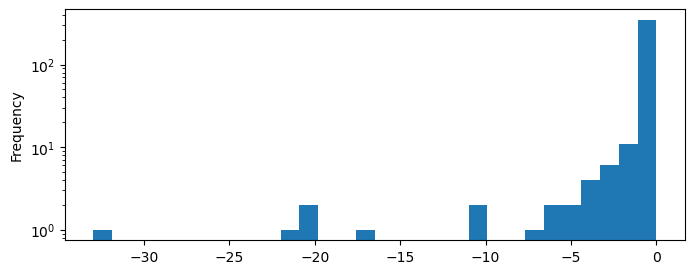

In [41]:
wc_diffs = wc_dreambank - wc_calculated
ax = wc_diffs.plot(kind="hist", figsize=(8, 3), bins=30)
ax.set_yscale("log")

See what's going on with the really large discrepancies.

In [42]:
with pd.option_context("display.max_colwidth", None):
    display(dreams.loc[wc_diffs.le(-10)])

Author  word_count Sex                  Nature Degree of Blindness  \
31     103          31   F  adventitious blindness   partial blindness   
262    104         139   M    congenital blindness     total blindness   
267    104         898   M    congenital blindness     total blindness   
268    104         368   M    congenital blindness     total blindness   
270    104         344   M    congenital blindness     total blindness   
272    104          81   M    congenital blindness     total blindness   
281    104         468   M    congenital blindness     total blindness   

    Years Blind Age  \
31           10  73   
262          45  45   
267          45  45   
268          45  45   
270          45  45   
272          45  45   
281          45  45   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Makes sense! DreamBank is not including bracketed content, which might systematically be non-dream content. Given the diversity of needs, and that many other dream datasets will inherently include this kind of content, I'll keep it in the dream report. We can drop the word_count column though.

In [43]:
dreams = dreams.drop(columns=["word_count"])

In [44]:
display(dreams.head(n=2))

,Author,Sex,Nature,Degree of Blindness,Years Blind,Age,dream_text
0,101,F,adventitious blindness,total blindness,19,27,I was at my parent's house that I grew up in a...
1,101,F,adventitious blindness,total blindness,19,27,I was back in the house that I grew up in and ...


Make sure that the author metadata is consistent across authors dataframe (extracted from moreinfo) and dreams dataframe (extracted from metadata columns).

In [45]:
authors_from_dreams = dreams.drop(columns=["dream_text"]).drop_duplicates().sort_values(by="Author", ignore_index=True)

In [46]:
display(authors_from_dreams)

,Author,Sex,Nature,Degree of Blindness,Years Blind,Age
0,101,F,adventitious blindness,total blindness,19,27
1,102,F,congenital blindness,total blindness,32,32
2,103,F,adventitious blindness,partial blindness,10,73
3,104,M,congenital blindness,total blindness,45,45
4,105,M,adventitious blindness,partial blindness,43,50
5,109,M,adventitious blindness,total blindness,20,24
6,111,F,congenital blindness,perceives very bright light,50,50
7,113,M,adventitious blindness,total blindness,17,45
8,114,F,congenital blindness,total blindness,52,52
9,115,F,adventitious blindness,total blindness,60,60


In [47]:
authors

,Code #,Sex,Age,Years of Education,Occupation,Retired,Years Blind,Nature,Degree of Blindness,# of dream reports
0,101,F,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,10
1,102,F,32,18.0,Unemployed,False,32,congenital blindness,total blindness,10
2,103,F,73,12.0,Sales clerk,True,10,adventitious blindness,partial blindness,39
3,104,M,45,16.0,Human resources management,False,45,congenital blindness,total blindness,61
4,105,M,50,18.0,Rehabilitation specialist,False,43,adventitious blindness,partial blindness,21
5,109,M,24,14.5,Software tech worker,False,20,adventitious blindness,total blindness,20
6,111,F,50,19.0,Vocational rehabilitation counselor,False,50,congenital blindness,perceives very bright light,59
7,113,M,45,13.0,Piano tuner/technician,False,17,adventitious blindness,total blindness,22
8,114,F,52,12.0,Envelope stuffer,False,52,congenital blindness,total blindness,37
9,115,F,60,14.0,Cook at a school for the blind,False,60,adventitious blindness,total blindness,6


In [48]:
assert authors_from_dreams["Author"].eq(authors["Code #"].astype(str)).all()
assert authors_from_dreams["Sex"].eq(authors["Sex"]).all()
assert authors_from_dreams["Age"].eq(authors["Age"].astype(str)).all()
assert authors_from_dreams["Degree of Blindness"].eq(authors["Degree of Blindness"]).all()
assert authors_from_dreams["Nature"].eq(authors["Nature"]).all()
assert authors_from_dreams["Years Blind"].eq(authors["Years Blind"].astype(str)).all()

Drop the author metadata from dreams dataframe since it is all already in authors dataframe, plus authors dataframe has additional metadata.

In [49]:
dreams = dreams.drop(columns=["Sex", "Age", "Degree of Blindness", "Nature", "Years Blind"])

In [50]:
n_dreams_from_dreams = dreams["Author"].astype(int).value_counts().sort_index()
n_dreams_from_authors = authors.set_index("Code #")["# of dream reports"].sort_index()

In [51]:
n_dreams = pd.concat([n_dreams_from_dreams, n_dreams_from_authors], axis=1, keys=["From dreams", "From authors"])

In [52]:
display(n_dreams)

,From dreams,From authors
101,10,10
102,10,10
103,39,39
104,61,61
105,22,21
109,20,20
111,60,59
113,27,22
114,37,37
115,6,6


There are a few rows where there are more dreams in the dataset than reported from the author table. This makes sense for the "3a" case (see above), but not sure about the others. I will leave it alone for now, as the number of dreams _in the dataset_ is the truth.

In [53]:
display(n_dreams[n_dreams["From dreams"] != n_dreams["From authors"]])

,From dreams,From authors
105,22,21
111,60,59
113,27,22
120,11,10
124,13,12


Drop number of dreams column since we should just calculate it later as-needed for most accurate values.

In [54]:
authors = authors.drop(columns=["# of dream reports"])

Clean actual dream reports.

In [55]:
display(dreams)

,Author,dream_text
0,101,I was at my parent's house that I grew up in a...
1,101,I was back in the house that I grew up in and ...
2,101,Right before waking up I remember standing in ...
3,101,Last night I dreamed that I went back to schoo...
4,101,"There was a book published, like a book of ess..."
...,...,...
376,124,[1997-07-25] I was going to the store to buy b...
377,124,[1997-08-01] Dreamt we went to an amusement pa...
378,124,[1997-08-07] I remember playing cards with Cla...
379,124,[1997-08-10] This dream had more reality about...


First we can remove any of the bracketed dates, pulling them out to their own column (will be empty/NA where not provided).

In [56]:
DREAM_TEXT_RE = r"^(?P<Date>\[\d{4}-\d{2}-\d{2}\])?\s?(?P<Report>.+)$"
assert dreams["dream_text"].str.match(DREAM_TEXT_RE).all()

In [57]:
dreams[["Date", "Report"]] = dreams["dream_text"].str.extract(DREAM_TEXT_RE)
dreams = dreams.drop(columns=["dream_text"])

In [58]:
dreams["Date"] = dreams["Date"].str.strip("[]")

In [59]:
dreams["Report"] = dreams["Report"].str.strip()

## Review

Rename columns in both dataframes to snake_case.

In [60]:
authors = authors.rename(
    columns={
        "Code #": "author",
        "Age": "age",
        "Sex": "sex",
        "Years of Education": "years_education",
        "Occupation": "occupation",
        "Retired": "retired",
        "Years Blind": "years_blind",
        "Nature": "nature_blindness",
        "Degree of Blindness": "degree_blindness",
        "# of dream reports": "n_reports",
    }
)

In [61]:
dreams = dreams.rename(
    columns={
        "Author": "author",
        "Date": "date",
        "Report": "report",
    }
)

Merge author info with dreams dataframe for one export file.

In [62]:
authors = authors.astype({"author": str})

In [63]:
df = authors.merge(dreams, on="author", how="right", validate="one_to_many")

In [64]:
df = df.replace({"sex": {"F": "female", "M": "male"}})

In [65]:
df = df.sort_values("author")

In [66]:
assert df["sex"].isin(["female", "male"]).all()
assert not df.drop(columns=["date"]).isna().any(axis=None)
assert (df["report"] == df["report"].str.strip()).all()
assert not df.duplicated().any()
assert not df.duplicated(subset=["report"]).any()
assert df.drop_duplicates(subset=["author", "sex", "age", "occupation", "retired", "years_blind", "nature_blindness", "degree_blindness"]).shape[0] == df["author"].nunique()

In [67]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 236
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            381 non-null    object 
 1   sex               381 non-null    object 
 2   age               381 non-null    int64  
 3   years_education   381 non-null    float64
 4   occupation        381 non-null    object 
 5   retired           381 non-null    object 
 6   years_blind       381 non-null    int64  
 7   nature_blindness  381 non-null    object 
 8   degree_blindness  381 non-null    object 
 9   date              245 non-null    object 
 10  report            381 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 443.2 KB


In [68]:
df.describe(include="number")

,age,years_education,years_blind
count,381.000000,381.000000,381.000000
mean,48.803150,15.259843,38.732283
std,11.275758,2.734899,14.491258
min,24.000000,12.000000,10.000000
25%,45.000000,12.000000,20.000000
50%,49.000000,16.000000,45.000000
75%,52.000000,18.000000,50.000000
max,73.000000,19.000000,60.000000


In [69]:
display(df.describe(exclude="number"))

,author,sex,occupation,retired,nature_blindness,degree_blindness,date,report
count,381,381,381,381,381,381,245,381
unique,15,2,13,2,2,3,90,381
top,104,female,Human resources management,False,congenital blindness,total blindness,1997-05-29,I was at my parent's house that I grew up in a...
freq,61,238,61,310,222,260,7,1


In [70]:
display(df)

,author,sex,age,years_education,occupation,retired,years_blind,nature_blindness,degree_blindness,date,report
0,101,female,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,NaN,I was at my parent's house that I grew up in a...
1,101,female,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,NaN,I was back in the house that I grew up in and ...
2,101,female,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,NaN,Right before waking up I remember standing in ...
3,101,female,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,NaN,Last night I dreamed that I went back to schoo...
4,101,female,27,15.0,Unemployed,False,19,adventitious blindness,total blindness,NaN,"There was a book published, like a book of ess..."
...,...,...,...,...,...,...,...,...,...,...,...
232,125,female,44,13.0,Medical transcriptionist,False,44,congenital blindness,total blindness,NaN,I am in a car with my friend Mark. Mark is tot...
233,125,female,44,13.0,Medical transcriptionist,False,44,congenital blindness,total blindness,NaN,I was at the [childhood school for the blind] ...
234,125,female,44,13.0,Medical transcriptionist,False,44,congenital blindness,total blindness,NaN,I had a dream of a friend of my father's whose...
235,125,female,44,13.0,Medical transcriptionist,False,44,congenital blindness,total blindness,NaN,I dreamt that I was typing medical reports at ...


## Export

In [71]:
def format_timestamp(unix_timestamp: float) -> str:
    """Convert unix timestamp to UTC-stamped ISO format."""
    dt = datetime.fromtimestamp(unix_timestamp, tz=timezone.utc)
    timestamp = dt.isoformat(timespec="seconds")
    return timestamp

In [72]:
OUTPATH = "./output/hurovitz1999.csv"
os.makedirs(os.path.dirname(OUTPATH), exist_ok=True)

TO_CSV_KWARGS = {
    "index": False,
    "na_rep": "N/A",
    "sep": ",",
    "mode": "x",  # Switch to `w` to overwrite existing file
    "encoding": "utf-8-sig",  # Include sig/BOM for better compatibility with Excel
    "lineterminator": "\n",
    "quoting": 2,  # 2 = csv.QUOTE_NONNUMERIC
    "quotechar": '"',
    "doublequote": True,
}
dreams.to_csv(OUTPATH, **TO_CSV_KWARGS)

print(f"{'file':>10}: {os.path.basename(OUTPATH)}")
print(f"{'size':>10}: {os.path.getsize(OUTPATH) / 1e6} MB")
with open(OUTPATH, "rb") as f:
    print(f"{'md5':>10}: {hashlib.md5(f.read()).hexdigest()}")
    print(f"{'sha256':>10}: {hashlib.sha256(f.read()).hexdigest()}")
print(f"{'Created':>10}: {format_timestamp(os.path.getatime(OUTPATH))}")
print(f"{'Modified':>10}: {format_timestamp(os.path.getmtime(OUTPATH))}")
print(f"{'Accessed':>10}: {format_timestamp(os.path.getatime(OUTPATH))}")
print(f"{'Now':>10}: {datetime.now(timezone.utc).isoformat(timespec='seconds')}")

      file: hurovitz1999.csv
      size: 0.279594 MB
       md5: 02c8a6cfaaa122f3459fe1132edaa2d8
    sha256: e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
   Created: 2026-01-09T16:50:01+00:00
  Modified: 2026-01-09T16:50:01+00:00
  Accessed: 2026-01-09T16:50:01+00:00
       Now: 2026-01-09T16:50:01+00:00
